In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
from IPython.display import display, Math
from uncertainties import ufloat

# Exercise 1: Calibration

The calibration data and a Gaussian fit are used to get the peak position and the calibration factor.\
The results are:\
Peak position: 412.54\
Energy calibration factor: 1.2387 keV/unit

This is used to process all further data.

# Exercise 2: Parity violation

The processed data of the positive and the negative setting of the magnetic field is examined to determine wether parity is violated.

In [2]:
# load the yaml file
with open('DataFolder/processed_files.yaml', 'r') as file:
    data = yaml.safe_load(file)['results_df']

# get the measurement values
val = [data[:][i]['Entries_Above_Threshold'] for i in range(len(data))]
val_p = val[:30] # positive field
val_m = val[30:] # negative field
sum_p = sum(val_p)
sum_m = sum(val_m)
p = ufloat(sum_p, np.sqrt(sum_p))
m = ufloat(sum_m, np.sqrt(sum_m))


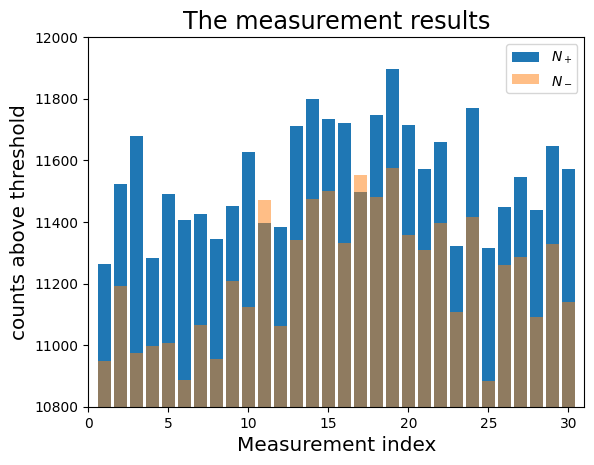

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# plot the measurements
x = range(1, 31)
plt.bar(x, val_p, label = '$N_+$')
plt.bar(x, val_m, alpha = 0.5, label = '$N_-$')
plt.ylim((10800, 12000))
plt.xlim((0, 31))
plt.title('The measurement results', size = 'xx-large')
plt.xlabel('Measurement index', size = 'x-large')
plt.ylabel('counts above threshold', size = 'x-large')
plt.legend()
plt.show()

# show the results
display(Math(rf'\text{{The sum of the detection counts is:}}'))
display(Math(rf'\text{{positive: }} n_+ = {p.n:.0f} \pm {p.s:.0f} \text{{ entries above threshold}}'))
display(Math(rf'\text{{negative: }} n_- = {m.n:.0f} \pm {m.s:.0f} \text{{ entries above threshold}}'))
display(Math(rf'\text{{mean difference: }}  \bar n_+ - \bar n_- = {p.n - m.n} \text{{ entries}}'))

Here the deviation is the square root of the values. $\Delta n = \sqrt {\bar n}$

The difference of the mean values is way larger than the deviation. That means it can be assumed that the parity is violated on $\beta$-decay.

## 2.1: Comparison of errors

To compare the errors of different estimations we use the value of the asymmetry $E = \frac{N_+ - N_-}{N_+ + N_-}$

Using Gaussian error propagation the error of E is calculated as follows
$$
\Delta E = \sqrt{\left[\left(\frac{1}{N_+ + N_-} - \frac{N_+ - N_-}{\left(N_+ + N_-\right)^2}\right) \Delta N_+ \right]^2 + \left[\left(-\frac{1}{N_+ + N_-} - \frac{N_+ - N_-}{\left(N_+ + N_-\right)^2}\right) \Delta N_-\right]^2}
$$


$$
\Delta E = \sqrt{\left(\frac{2N_-}{\left( N_+ + N_- \right)^2} \Delta N_+\right)^2 + \left(\frac{2N_+}{\left(N_+ + N_-\right)^2} \Delta N_-\right)^2}
$$

One method uses the squareroot of the sums $N_+$ and $N_-$:\
$\Delta N_\pm = \sqrt{\bar N_\pm}$

The other one estimates $E$ for each pair of values $N_+$ and $N_-$ with the statistical deviation $\sigma = \sqrt{\frac{\sum \left( E - \bar E \right)^2}{N}}$ and the error of the mean $\frac{\sigma}{\sqrt{N}}$ where N is the number of pairs of values.

In [4]:
E1 = (p - m) / (p + m)
E2 = [(val_p[i] - val_m[i]) / (val_p[i] + val_m[i]) for i in range(30)]
E2 = ufloat(np.mean(E2), np.std(E2) / np.sqrt(30))

display(Math(rf'\text{{For the sum: }} E_{{Sum}} = {E1.n:.6f}\pm{E1.s:.6f}'))
display(Math(rf'\text{{For each pair of values: }} E_{{Pairs}} = {E2.n:.6f}\pm{E2.s:.6f}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

So its almost the same. For this evaluation the values of the first method are used.

# Exercise 3: Degree of Polarisation of $\gamma$

The polarisation $P_C$ of the bremsstrahlung is determined using this formula:
$$
E = \frac{N_+ - N_-}{N_+ + N_-} = f P_C \frac{\phi_C^-}{\phi_0}
$$
$$
\Rightarrow P_C = \frac{N_+ - N_-}{N_+ + N_-} \frac{\phi_0}{\phi_C^-} \frac{1}{f}
$$

And the deviation:
$$
\Delta P_C = \sqrt{\left(\frac{\phi_0}{\phi_C^-} \frac{1}{f} \Delta E\right)^2 + \left(E \frac{1}{f} \Delta \left(\frac{\phi_0}{\phi_C^-}\right)\right)^2 + \left(E \frac{\phi_0}{\phi_C^-} \frac{1}{f^2} \Delta f\right)^2}
$$
Since no error for f is given it is assumed as 0. It follows:
$$
\Delta P_C = \sqrt{\left(\frac{\phi_0}{\phi_C^-} \frac{1}{f} \Delta E\right)^2 + \left(E \frac{1}{f} \Delta \left(\frac{\phi_0}{\phi_C^-}\right)\right)^2}
$$

With\
$f = \frac{1}{13}$\
$\frac{\phi_C^-}{\phi_0} = 0.52 \pm 0.05$

It follows:

In [5]:
E = E1
phi_ratio = ufloat(0.52, 0.05)
f = 1 / 13

P_C = E / (phi_ratio * f)

display(Math(rf'P_C = {P_C.n:.3} \pm {P_C.s:.2}'))

<IPython.core.display.Math object>

So the degree of polarisation is about $35\%-36\%$ for the bremsstrahlung.

# Exercise 4: Longitudinal Polarisation of $e^-$

Here the longitudinal polarisation is the same as the helicity of the electrons ($\rightarrow$ blue book).\
The helicity is calculated as follows:
$$
H = \frac{P_C}{L}
$$
$$
\Delta H = \sqrt{\left(\frac{1}{L}\Delta P_C\right)^2 + \left(\frac{P_C}{L^2} \Delta L\right)^2}
$$
where L is the helicity transfer. It's value is taken from the $2.5MeV$ curve in figure 7.7 in the blue book (Note to Shivam: Could you link this to the figure in the protocol if it's included? Thank you)\
To get the value the ratio of the Energies is needed.\
$E_\gamma \geq 1MeV$ as this was the criterium in the first place.\
$E_{e, max} = 2.28MeV$ (source: https://en.wikipedia.org/wiki/Yttrium-90, please add this to the references)\
Only the kinetic energy is transferred. It follows: $E_{kin, max} = E_{e, max} - m_e c^2 = 2.28MeV - 0.51MeV = 1.77MeV$\
That means the minimum of $\frac{E_\gamma}{E_{kin}}$ is $\frac 1 {1.77} = 0.56$.\
It follows: $0.56 \leq L \leq 0.92$, $L = 0.74 \pm 0.18$.

So the longitudinal polarisation is:


In [6]:
L = ufloat(0.74, 0.18)
H = P_C / L
display(Math(rf'H = {H.n:.3f} \pm {H.s:.3f}'))

<IPython.core.display.Math object>